In [2]:
import numpy as np
import pandas as pd
import pickle
#from build_database import flux_obj
from scipy import interpolate
import matplotlib.pyplot as plt
import os
import itertools
import random
import os
%matplotlib inline
# Autoload changes made in external editor:
%load_ext autoreload
%autoreload 2

# --------------- Latex Plot Beautification --------------------------
fig_width_pt = 650.0  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inch
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_width*golden_mean      # height in inches
fig_size =  [fig_width+1,fig_height+1]
params = {'backend': 'ps',
          'axes.labelsize': 14,
          'text.fontsize': 14,
          'legend.fontsize': 10,
          'xtick.labelsize': 10,
          'ytick.labelsize': 10,
          'text.usetex': False,
          'figure.figsize': fig_size}
plt.rcParams.update(params)

# --------------- Latex Plot Beautification --------------------------

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


loading  /Users/austin/FUSE/shared/users/asousa/WIPP/WIPPy/rays/full_kp0_15sec/newray289.dat
[  6.   7.   8.   9.  10.  11.  12.  13.  14.  15.  16.  17.  18.  19.  20.
  21.  22.  23.  24.  25.  26.  27.  28.  29.  30.  31.  32.  33.  34.  35.
  36.  37.  38.  39.  40.  41.  42.  43.  44.  45.  46.  47.  48.  49.  50.
  51.  52.  53.  54.  55.  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.
  66.  67.  68.  69.  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.]


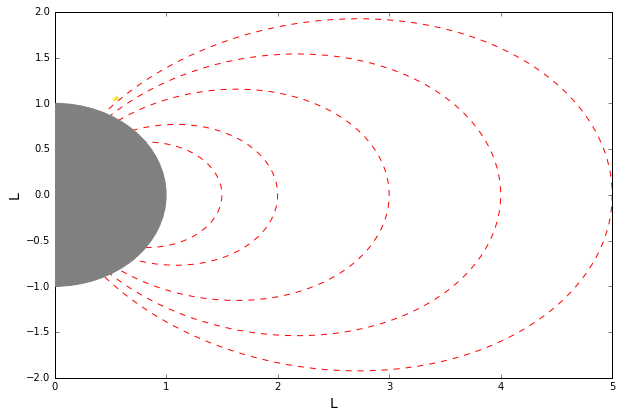

In [130]:
from matplotlib import collections  as mc
from load_rayfile import load_rayfile
directory = '/Users/austin/FUSE/shared/users/asousa/WIPP/WIPPy/rays/full_kp0_15sec'
frequency = 289

L_shells = [1.5, 2, 3, 4, 5]

l_min = 63
l_max = 63




RF = load_rayfile(directory, frequency)
all_lats = np.array(sorted(RF.keys()))
lats = all_lats[(all_lats >= l_min) & (all_lats <= l_max)]
print all_lats

# Initialize plot
fig, ax = plt.subplots()

# Plot the earth
earth = plt.Circle((0,0),1,color='0.5',alpha=1, zorder=100)

# Plot the fieldlines
for L in L_shells:
    lam = np.linspace(-80,80,181)
    L_r = L*pow(np.cos(lam*sc.D2R),2)
    Lx  = L_r*np.cos(lam*sc.D2R)
    Ly  = L_r*np.sin(lam*sc.D2R)
    plt.plot(Lx,Ly,color='r',linewidth=1,linestyle='dashed')  # Field line

# Plot the rays
for l in lats:    
    X = RF[l].distre*np.cos(RF[l].lat*np.pi/180.0)
    Y = RF[l].distre*np.sin(RF[l].lat*np.pi/180.0)
    # pick colormap here
    C = plt.cm.viridis(RF[l].power)
    points = np.array([X, Y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)

    lc = mc.LineCollection(segments, colors=C,alpha=1,linewidth=3)
#     lc.set_linewidth(10)

    ax.add_collection(lc)


ax.add_patch(earth)                    # The earth (round)

ax.autoscale()
ax.set_xlim([0, 5])
ax.set_ylim([-2, 2])
ax.set_xlabel('L')
ax.set_ylabel('L')



plt.show()




In [115]:
RF

{42:              tg    distre        lat      delta        tp      l_sh  \
 2      0.000000  1.156986  42.500000   0.000000  0.000000  2.128464   
 3      0.003422  1.164219  42.403004   0.207773  0.003255  2.135147   
 4      0.006871  1.172093  42.297287   0.451303  0.006511  2.142369   
 5      0.010358  1.180689  42.181713   0.736821  0.009766  2.150189   
 6      0.013899  1.190081  42.055210   1.069020  0.013021  2.158658   
 7      0.017511  1.200316  41.917027   1.447593  0.016276  2.167794   
 8      0.021210  1.211388  41.767094   1.862910  0.019532  2.177560   
 9      0.025001  1.223206  41.606373   2.294985  0.022787  2.187846   
 10     0.028875  1.235608  41.436855   2.720131  0.026042  2.198479   
 11     0.032812  1.248398  41.261059   3.121263  0.029297  2.209273   
 12     0.036787  1.261400  41.081345   3.492171  0.032553  2.220070   
 13     0.040782  1.274485  40.899555   3.834312  0.035808  2.230764   
 14     0.044783  1.287566  40.716946   4.151990  0.039063  

In [62]:
np.max(plt.cm.jet(RF[l].power))

1.0

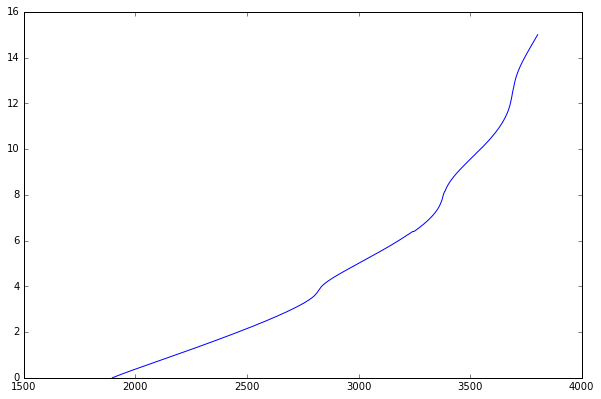

In [123]:
plt.plot((RF[43].tg))

In [125]:
EAa = gen_EA_array(3)
EAa


,lam,x1,x2,y1,y2,EAa,EAb,EAc,EA_length
0,0,2.900000,3.100000,0.000000,0.000000,0.000000,0.200000,0.000000,1275600.000000
1,5,2.871425,3.060340,0.234304,0.284658,-0.050355,0.188915,0.100326,1246965.098131
2,10,2.785672,2.945001,0.460301,0.550171,-0.089870,0.159329,0.177010,1166712.376475
3,15,2.643702,2.763624,0.668163,0.780726,-0.112562,0.119922,0.217454,1049013.871328
4,20,2.449441,2.529175,0.846812,0.965256,-0.118444,0.079734,0.222602,910657.357429
5,25,2.210807,2.255806,0.985711,1.097105,-0.111394,0.044999,0.201915,766252.113856
6,30,1.939278,1.957836,1.076786,1.173214,-0.096429,0.018558,0.167019,626307.166766
7,35,1.648617,1.649338,1.115634,1.193619,-0.077985,0.000721,0.127763,497407.623667
8,40,1.353408,1.343792,1.101958,1.161261,-0.059303,-0.009616,0.090858,383175.901420
